<a href="https://colab.research.google.com/github/marcoscapponi/Proyecto-Data-Science-Capponi/blob/main/Proyecto_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mental Health

##Este proyecto sobre la salud mental en el trabajo, tiene la finalidad de hacer un analisis exhaustivo sobre una poblacion determinada, para identificar si el trabajo remoto es beneficioso para la salud mental o no.

###Tomaremos los datos de una base de datos donde tenemos como parametro 5.000 empleados(con su columna Employee_ID) de distintas empresas y distintos puestos de trabajo.

###Tambien tendremos como variables para analizar si el trabajo remoto es bueno o no para la gente, las variables:

Access_to_Mental_health: Acceso a la salud mental. Puede ser Si o No.
Age: Edad del empleado.

Company_Support_for_Remote_Work: Ayuda de la empresa con el trabajo remoto. Valores del 1 al 5.

Gender: Genero. Puede ser Male, Female, Non-binary, Prefer not to say.

Hours_Work_per_Week: Cantidad de horas trabajadas por semana.

Mental_Health_Condition: Condicion mental del empleado. Los valores son Depresion, Anxiety, Burnout y None.

Number_of_Virtual_Meetings: Cantidad de reuniones virtuales.

Physical_Activity: Si el empleado hace actividad fisica o no. Valores, None, Daily, Weekly.

Productivity_Change: Si su nivel de productividad se incremento, decayo o permanecio igual. Los valores son Increase, Decrease, No change.

Region: Region del planeta en el que el empleado habita. Puede ser Europe, Asia, North America, Africa, South America, Oceania.

Satisfaction_with_Remote_Work: El empleado esta satisfecho con el trabajo remoto o no. Valores Satisfied, Unsatisfied, Neutral.

Sleep_Quality: Calidad del suenio. Los Valores pueden ser Good, Average o Poor.

Social_isolation_Rating: Ranking de si el empleado esta socialmente aislado o no. Sus valores van del 1 al 5.

Stress_Level: Nivel de estres del empleado. Los valores son Low, Medium, High.

Work_life_Balance: balance entre el trabajo y la vida. Los valores van del 1 al 5.

Years_of_Experience: Anios de experiencia en la empresa.



###El analisis que llevaremos a cabo seria alrededor de la columna Work_Location y Gender, para poder al final del proyecto predecir si la inversion del trabajo remoto es mejor al trabajo presencial. Con mejor me refierio a evaluar que metodo de trabajo(incluso el formato hibrido) es mejor para la salud mental de las personas. La idea es usar un algoritmo de regresion para poder predecir si la modalidad de trabajo ayuda a la salud mental o no.
###Luego del analasis, intentaremos predecir con algoritmos de clasificacion que empleados gozan de una buena salud mental gracias al trabajo remoto o hibrido y quienes no.








In [ ]:
#Link de este colab
https://colab.research.google.com/drive/1ol7j51njJzP25dsCPhSGcczoJ4LxKPM9

In [1]:
#Aqui instalaremos e importaremos todas las librerias que usaremos en todo el proyecto.
!pip install chart_studio
!pip install scikit-learn
!pip install dataprep
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
import bokeh
import os
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as sn
import chart_studio.plotly as py
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import plotly.express as px
import plotly.graph_objects as go
from dataprep.eda import create_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.6/153.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of da

In [2]:
#Importamos la base de datos desde google drive, y transformamos nuestro archivo csv en un DataFrame con pandas.
from google.colab import drive
drive.mount('/content/gdrive')
file_path = '/content/gdrive/My Drive/Impact_of_Remote_Work_on_Mental_Health.csv'
print(file_path)
d1 = pd.read_csv(file_path)
df = pd.DataFrame(d1)

Mounted at /content/gdrive
/content/gdrive/My Drive/Impact_of_Remote_Work_on_Mental_Health.csv


##Lectura, analisis y descripcion del dataset

In [ ]:
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [ ]:
print(df['Work_Location'].value_counts())
#Remote 2
#Hybrid 0
#Onsite 1

Remote    1714
Hybrid    1649
Onsite    1637
Name: Work_Location, dtype: int64


In [ ]:
df.tail()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,None,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,None,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia
4999,EMP5000,29,Male,HR,IT,30,Onsite,20,15,1,Low,Depression,Yes,No Change,3,Unsatisfied,5,None,Poor,Asia


In [ ]:
df.sample(7)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
4553,EMP4554,51,Female,Marketing,Healthcare,14,Onsite,49,11,2,Medium,Depression,Yes,Decrease,4,Satisfied,5,Weekly,Poor,South America
4162,EMP4163,40,Male,Software Engineer,Education,8,Hybrid,48,3,3,Low,Depression,No,Decrease,4,Unsatisfied,3,None,Good,Asia
4930,EMP4931,53,Female,HR,Retail,23,Hybrid,33,3,2,Low,Burnout,No,No Change,1,Satisfied,3,Daily,Good,North America
3288,EMP3289,51,Prefer not to say,Sales,IT,15,Hybrid,32,12,1,High,Burnout,Yes,Decrease,2,Neutral,1,Weekly,Average,Europe
4490,EMP4491,27,Female,Sales,Consulting,5,Remote,22,2,4,Medium,None,No,Decrease,1,Satisfied,1,Weekly,Good,Europe
4144,EMP4145,44,Non-binary,HR,IT,3,Onsite,59,0,2,Low,Depression,Yes,Decrease,1,Unsatisfied,5,Daily,Good,Africa
585,EMP0586,43,Female,Sales,Education,13,Onsite,20,5,3,Low,Burnout,No,No Change,3,Neutral,1,Daily,Good,Europe


In [ ]:
#Mostramos la cantidad de filas y columnas.
df.shape

(5000, 20)

In [ ]:
 #Vemos el tipo de datos y la cantidad de estos.
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            5000 non-null   object
 12  Access

In [ ]:
#Mostramos un breve cuadro estadistico de las variables numericas.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,40.9950,11.296021,22.0,31.0,41.0,51.0,60.0
Years_of_Experience,5000.0,17.8102,10.020412,1.0,9.0,18.0,26.0,35.0
Hours_Worked_Per_Week,5000.0,39.6146,11.860194,20.0,29.0,40.0,50.0,60.0
Number_of_Virtual_Meetings,5000.0,7.5590,4.636121,0.0,4.0,8.0,12.0,15.0
Work_Life_Balance_Rating,5000.0,2.9842,1.410513,1.0,2.0,3.0,4.0,5.0
Social_Isolation_Rating,5000.0,2.9938,1.394615,1.0,2.0,3.0,4.0,5.0
Company_Support_for_Remote_Work,5000.0,3.0078,1.399046,1.0,2.0,3.0,4.0,5.0


In [ ]:
#Verificamos si hay datos duplicados.
df.duplicated().sum()

0

In [ ]:
#Verificamos si hay datos nulos.
df.isnull().sum()

,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0


In [ ]:
#Vemos los tipos de datos segun variable.
df.dtypes

,0
Employee_ID,object
Age,int64
Gender,object
Job_Role,object
Industry,object
Years_of_Experience,int64
Work_Location,object
Hours_Worked_Per_Week,int64
Number_of_Virtual_Meetings,int64
Work_Life_Balance_Rating,int64


Analis estadistico de los datos y creacion de graficos.

In [ ]:
#Agrupamos por locacion de trabajo, genero y ranking de balance entre el trabajo y la vida, y luego hacemos un grafico de barras.
Work_life_balance_rating_por_genero_y_work_location = df[['Work_Location', 'Gender', 'Work_Life_Balance_Rating']].groupby(by=['Work_Location', 'Gender', 'Work_Life_Balance_Rating']).size().unstack(fill_value=0)
print(Work_life_balance_rating_por_genero_y_work_location)
df_grouped = df.groupby(['Work_Location', 'Gender', 'Work_Life_Balance_Rating']).size().reset_index(name='count')
df_grouped['percentage'] = df_grouped.groupby(['Work_Location', 'Gender'])['count'].transform(lambda x: x / x.sum() * 100)
fig = px.bar(df_grouped, x='Work_Location', y='count', color='Work_Life_Balance_Rating', barmode='group', facet_col='Gender',
             title='Locacion del trabajo y genero segun ranking del balance entre el trabajo y la vida', text="percentage",
             labels={'Work_Location': 'Work Location', 'count': 'Count', 'Work_Life_Balance_Rating': 'Work_Life_Balance_Rating'})
fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
fig.show()

Work_Life_Balance_Rating           1   2    3   4    5
Work_Location Gender                                  
Hybrid        Female              87  88   81  90   95
              Male                88  67   76  73   83
              Non-binary          86  68   91  73   95
              Prefer not to say   61  95  100  87   65
Onsite        Female              75  76   80  78   71
              Male               101  88   93  89   81
              Non-binary          70  93  102  62   73
              Prefer not to say   87  72   91  81   74
Remote        Female              85  84   85  99  100
              Male                96  77   86  86   86
              Non-binary          88  78   73  87   75
              Prefer not to say   99  81   95  75   79


Este grafico sobre el balance en entre la vida y el trabajo nos muetra que en el caso de las mujeres hay un mayor porcentaje de balance entre el trabajo y la vida a las mujeres que trabajan de manera remota.

En el caso de los hombres, analizando los polos, se ve que hay mas hombres con un desbalance entre su vida y el trabajo sin inportar en el locacion del trabajo.

Para la categoria Non-binary, tienen un mejor balance las personas que trabjan hibrido.

Y los que prefieren no decir su genero, en los tres casos salvo hibrido votaron que no tienen un buen balance o un balance promedio

In [ ]:
#Agrupamos por locacion de trabajo, genero y rol de trabajo, y luego hacemos un grafico histograma.
work_location_por_genero_y_job_role = df[['Work_Location', 'Gender', 'Job_Role']].groupby(by=['Work_Location', 'Gender', 'Job_Role']).size().unstack(fill_value=0)
print(work_location_por_genero_y_job_role)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
df_grouped = df.groupby(['Work_Location', 'Gender', 'Job_Role']).size().reset_index(name='count')
df_grouped['percentage'] = df_grouped.groupby(['Work_Location', 'Gender'])['count'].transform(lambda x: x / x.sum() * 100)
fig = px.histogram(df_grouped, x='Job_Role', y='count', facet_col='Work_Location', color='Gender',
                 title='Locacion del trabajo y genero segun rol de trabajo')
fig.update_traces(texttemplate='%{y}', textposition='inside')
fig.show()

Job_Role                         Data Scientist  Designer  HR  Marketing  Project Manager  Sales  Software Engineer
Work_Location Gender                                                                                               
Hybrid        Female                         65        66  60         48               68     68                 66
              Male                           49        50  64         63               64     54                 43
              Non-binary                     51        74  45         61               57     67                 58
              Prefer not to say              61        61  64         53               55     54                 60
Onsite        Female                         60        57  51         56               47     60                 49
              Male                           60        58  62         63               78     68                 63
              Non-binary                     44        56  53         59

Este grafico de barra analiza el porcentaje de los tipos de genero segun los roles de trabajo y el formato de trabajo.

Por parte de los hombres, en los roles de ingenieria de software, Marketing y disenio trabajan mas de manera remota. Para el caso de ventas, project manager y data scientist trabajan de manera presencial. Y los hombres que trabajan de recursos humanos, lo hacen mayoritariamente de manera hibrida.

En las mujeres, las mujeres que hacen data sciences, houman resources y marketing lo hacen mayoritariamente de manera remota. Por otro lado en los rubros de disenio, project manager, sales y software engineer lo hacen de forma hybrida. Y En menor medida en todos los rubros son de forma presencial.

Para los no binarios, solo los que se dedican a software engineer los hacen moyoritariamente de manera presencial. Para disenio, marketing y ventas lo hacen mas de manera hibrida. Y el resto mayormente de manera remota.


In [ ]:
#Agrupamos por locacion de trabajo, genero e industria, y luego hacemos un grafico histograma.
work_location_por_genero_e_industria = df[[ 'Work_Location', 'Gender', 'Industry']].groupby(by=['Work_Location', 'Gender', 'Industry']).size().unstack(fill_value=0)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
print(work_location_por_genero_e_industria)
df_grouped = df.groupby(['Work_Location', 'Gender', 'Industry']).size().reset_index(name='count')
df_grouped['percentage'] = df_grouped.groupby(['Work_Location', 'Gender'])['count'].transform(lambda x: x / x.sum() * 100)
fig = px.histogram(df_grouped, x='Industry', y='count', facet_col='Work_Location', color='Gender',
                 title='Locacion del trabajo y genero segun industria')
fig.update_traces(texttemplate='%{y}', textposition='inside')
fig.show()

Industry                         Consulting  Education  Finance  Healthcare  IT  Manufacturing  Retail
Work_Location Gender                                                                                  
Hybrid        Female                     63         53       71          70  63             56      65
              Male                       54         55       57          60  67             41      53
              Non-binary                 54         52       66          61  58             62      60
              Prefer not to say          53         52       65          56  64             64      54
Onsite        Female                     50         54       64          50  64             44      54
              Male                       59         67       62          62  70             57      75
              Non-binary                 58         61       37          73  56             55      60
              Prefer not to say          64         58       68          

En este grafico vemos como se distribuye los generos por industria y tipo de trabajo.

En las mujeres vemos que en la industria de consultas, educacion y manufactura, son en mayoeia las que trabajan de manera remota. Para el caso de empresas de finanza cuidado de la salud, y en el comercio minorista, se usa mas el trabajo de forma hibrida. Y en el caso de la industria IT lo hacen mayormente de forma presencial.

Para los hombres, en las industrias consulting y finance predomina el trabajo remoto. En la industria de education, healthcare, IT, manufacturing y retail, se efectuan los trabajos de manera presencial.

Y para los no binarios, consulting, education, healthcare y retail se hacen los trabajos mayormente de manera presencial. De forma remota lo hacen mas las industrias manufacturing e IT. Y de manera hibrida, la industria de las finanzas hace mas uso de este tipo de trabajo.



In [ ]:
#Agrupamos por locacion de trabajo, genero y nivel de estres, y luego hacemos un grafico de arbol.
nivel_stress_por_genero_y_work_location = df[['Work_Location', 'Gender', 'Stress_Level']].groupby(by=['Work_Location', 'Gender', 'Stress_Level']).size().unstack(fill_value=0)
print(nivel_stress_por_genero_y_work_location)
df_grouped = df.groupby(['Work_Location', 'Gender', 'Stress_Level']).size().reset_index(name='count')
df_grouped['percentage'] = df_grouped.groupby(['Work_Location', 'Stress_Level'])['count'].transform(lambda x: x / x.sum() * 100)
fig = px.treemap(df_grouped, path=['Work_Location', 'Stress_Level', 'Gender'], values='count', color='Gender',
                 title='Locacion del trabajo y genero segun nivel de estres',
                 color_discrete_sequence=px.colors.qualitative.Pastel)
fig.data[0].texttemplate = "%{label}<br>Count: %{value}<br>Percentage: %{customdata[0]:.1f}%"
fig.data[0].customdata = df_grouped[['percentage']].values
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

Stress_Level                     High  Low  Medium
Work_Location Gender                              
Hybrid        Female              161  140     140
              Male                122  129     136
              Non-binary          132  134     147
              Prefer not to say   146  140     122
Onsite        Female              119  134     127
              Male                140  147     165
              Non-binary          135  144     121
              Prefer not to say   141  130     134
Remote        Female              157  138     158
              Male                136  154     141
              Non-binary          144  122     135
              Prefer not to say   153  133     143


En este grafico de arbol vemos que tanto afecta al nivel de estres el tipo de trabajo por genero.

Para la gente que trabaja de manera remota, las mujeres y los no binarios presentan una mayor tendencia a tener un nivel de estres alto. En cambio los hombres presentan una menor cantidad de nivel de estres.

En el caso del trabajo presencial, los hombres presentan en mayor medida un nivel medio de estres, y para las mujeres y los no binarios, presentan en mayor medida un nivel bajo de estres.

Y en el trabajo hibrido, las mujeres presentan mayores niveles de estres. Para los hombres y los no binarios, se ve un nivel de estres medio como predominante.

In [ ]:
#Agrupamos por locacion de trabajo, genero y condicion de salud mental, y luego hacemos un grafico de barras.
condicion_mental_por_genero_y_work_location = df[['Work_Location', 'Gender', 'Mental_Health_Condition']].groupby(by=['Work_Location', 'Gender', 'Mental_Health_Condition']).size().unstack(fill_value=0)
print(condicion_mental_por_genero_y_work_location)
df_grouped = df.groupby(['Work_Location', 'Gender', 'Mental_Health_Condition']).size().reset_index(name='count')
df_grouped['percentage'] = df_grouped.groupby(['Work_Location', 'Mental_Health_Condition'])['count'].transform(lambda x: x / x.sum() * 100)
fig = px.bar(df_grouped, x='Work_Location', y='count', color='Gender', barmode='group', facet_col='Mental_Health_Condition',
             title='Locacion del trabajo y genero segun condicion de salud mental', text="percentage",
             labels={'Work_Location': 'Work_Location', 'count': 'Count', 'Mental_Health_Condition': 'Mental_Health_Condition'})
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.show()

Mental_Health_Condition          Anxiety  Burnout  Depression  None
Work_Location Gender                                               
Hybrid        Female                 104      112         120   105
              Male                   100       99         102    86
              Non-binary             116       89         103   105
              Prefer not to say      108      100          96   104
Onsite        Female                  93      100          87   100
              Male                   116      121         128    87
              Non-binary              82      108         114    96
              Prefer not to say      116      113          83    93
Remote        Female                 114      115         114   110
              Male                   108      116         104   103
              Non-binary             107      104          94    96
              Prefer not to say      114      103         101   111


Aqui veremos el nivel de ansiedad de los empleados segun de que manera trabajan y segun el genero.

Se puede ver que en los hombres que trabajan de manera presencial, y las mujeres que lo hacen de manera hibrida sufren mas depresion y burnout que de ansiedad o no padecimiento.

Los que trabajan de manera remota presentan mas niveles de ansiedad y burnout que de depresion y no padecimiento.

In [ ]:
#Agrupamos por locacion de trabajo, genero y acceso a recursos de salud mental, y luego hacemos un grafico de barras.
Access_to_mental_health_services_por_genero_y_work_location = df[['Work_Location', 'Gender', 'Access_to_Mental_Health_Resources']].groupby(by=['Work_Location', 'Gender', 'Access_to_Mental_Health_Resources']).size().unstack(fill_value=0)
print(Access_to_mental_health_services_por_genero_y_work_location)
df_grouped = df.groupby(['Work_Location', 'Gender', 'Access_to_Mental_Health_Resources']).size().reset_index(name='count')
df_grouped['percentage'] = df_grouped.groupby(['Work_Location', 'Gender'])['count'].transform(lambda x: x / x.sum() * 100)
fig = px.bar(df_grouped, x='Work_Location', y='count', color='Access_to_Mental_Health_Resources', barmode='group', facet_col='Gender',
             title='Locacion del trabajo y genero segun acceso a recursos de salud mental', text="percentage",
             labels={'Work_Location': 'Work Location', 'count': 'Count', 'Access_to_Mental_Health_Resources': 'Access_to_Mental_Health_Resources'})
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.show()

Access_to_Mental_Health_Resources   No  Yes
Work_Location Gender                       
Hybrid        Female               221  220
              Male                 188  199
              Non-binary           228  185
              Prefer not to say    200  208
Onsite        Female               207  173
              Male                 227  225
              Non-binary           188  212
              Prefer not to say    198  207
Remote        Female               235  218
              Male                 235  196
              Non-binary           209  192
              Prefer not to say    217  212


En este grafico veremos si las personas tienen acceso a la salud mental o no segun genero y locacion del trabajo.

Se puede ver que en mayor medida los hombres tienen menos acceso a la salud mental en comparacion con los que si. Lo mismo para con las mujeres y los de genero no binario.



In [ ]:
#Agrupamos por locacion de trabajo, genero y cambio en la produccion, y luego hacemos un grafico de arbol.
Productivity_Change_por_genero_y_work_location = df[['Work_Location', 'Gender', 'Productivity_Change']].groupby(by=['Work_Location', 'Gender', 'Productivity_Change']).size().unstack(fill_value=0)
print(Productivity_Change_por_genero_y_work_location)
df_grouped = df.groupby(['Work_Location', 'Gender', 'Productivity_Change']).size().reset_index(name='count')
df_grouped['percentage'] = df_grouped.groupby(['Work_Location', 'Productivity_Change'])['count'].transform(lambda x: x / x.sum() * 100)
fig = px.treemap(df_grouped, path=['Work_Location', 'Productivity_Change', 'Gender'], values='count', color='Gender',
                 title='Locacion del trabajo y genero segun cambio en la productividad',
                  color_discrete_sequence=px.colors.qualitative.Pastel)
fig.data[0].texttemplate = "%{label}<br>Count: %{value}<br>Percentage: %{customdata[0]:.1f}%"
fig.data[0].customdata = df_grouped[['percentage']].values
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

Productivity_Change              Decrease  Increase  No Change
Work_Location Gender                                          
Hybrid        Female                  162       136        143
              Male                    143       119        125
              Non-binary              146       128        139
              Prefer not to say       140       131        137
Onsite        Female                  127       131        122
              Male                    150       131        171
              Non-binary              146       124        130
              Prefer not to say       135       128        142
Remote        Female                  156       146        151
              Male                    137       140        154
              Non-binary              140       135        126
              Prefer not to say       155       137        137


En este grafico de arbol veremos si hay un cambio en la productividad por genero y metodo de trabajo.

Por parte de los hombres, los que trabajan de manera remota y presencial no se ven cambios en su productividad. Si se ve un leve decrecimiento para los que lo hacen de manera hibrida.

En el caso de las muejeres, se ve un aumento en la productividad para las que lo hacen de manera presencial. Y se ve un decrecimiento en las que trabajan de manera hibrida y remota.

Los que forman parte del genero no binario, presentan un decresimiento en las tres formas de trabajo.

In [ ]:
#Agrupamos por locacion de trabajo, genero y ranking de aislacion social, y luego hacemos un grafico de barras.
social_isolation_por_genero_y_work_location = df[['Work_Location', 'Gender', 'Social_Isolation_Rating']].groupby(by=['Work_Location', 'Gender', 'Social_Isolation_Rating']).size().unstack(fill_value=0)
print(social_isolation_por_genero_y_work_location)
df_grouped = df.groupby(['Work_Location', 'Gender', 'Social_Isolation_Rating']).size().reset_index(name='count')
df_grouped['percentage'] = df_grouped.groupby(['Work_Location', 'Gender'])['count'].transform(lambda x: x / x.sum() * 100)
fig = px.bar(df_grouped, x='Work_Location', y='count', color='Social_Isolation_Rating', barmode='group', facet_col='Gender',
             title='Locacion del trabajo y genero segun ranking de aislamiento social', text='percentage',
             labels={'Work_Location': 'Work Location', 'count': 'Count', 'Social_Isolation_Rating': 'Social_Isolation_Rating'})
fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
fig.show()

Social_Isolation_Rating           1    2   3   4   5
Work_Location Gender                                
Hybrid        Female             74   95  94  95  83
              Male               78   78  81  84  66
              Non-binary         74   74  97  83  85
              Prefer not to say  86   94  63  81  84
Onsite        Female             66   76  70  91  77
              Male               84   88  97  85  98
              Non-binary         71   82  78  93  76
              Prefer not to say  90   99  69  77  70
Remote        Female             79  101  94  95  84
              Male               87   89  77  93  85
              Non-binary         77   87  77  89  71
              Prefer not to say  87  103  95  71  73


En este grafico buscamos diferenciar si las personas presentan aislacion social o no dependiendo de la forma de trabajo. Se hace un ranking del 1 al 5 de aislacion segun lugar de trabajo y genero.

En lo hombres se ve que los que trabajan de manera presencial presentan mas niveles de aislacion que los que lo hacen de manera remota que se los ve mas balanceados en este ranking.

En las muejeres en las tres formas de trabajo se ve un balance tirando a aislamiento de la sociedad.

Y en los de genero no binario se aprecia tambien un buen balance entre las tres formas de trabajo.

In [ ]:
#Agrupamos segun locacion de trabajo, genero y satisfaccion con el trabajo remoto, y luego hacemos un grafico de arbol.
Satisfaction_with_Remote_Work_por_genero_y_work_location = df[['Work_Location', 'Gender', 'Satisfaction_with_Remote_Work']].groupby(by=['Work_Location', 'Gender', 'Satisfaction_with_Remote_Work']).size().unstack(fill_value=0)
print(Satisfaction_with_Remote_Work_por_genero_y_work_location)
df_grouped = df.groupby(['Work_Location', 'Gender', 'Satisfaction_with_Remote_Work']).size().reset_index(name='count')
df_grouped['percentage'] = df_grouped.groupby(['Work_Location', 'Satisfaction_with_Remote_Work'])['count'].transform(lambda x: x / x.sum() * 100)
fig = px.treemap(df_grouped, path=['Work_Location', 'Satisfaction_with_Remote_Work', 'Gender'], values='count', color='Gender',
                 title='Locacion del trabajo y genero segun satisfaccion con el trabajo remoto',
                 color_discrete_sequence=px.colors.qualitative.Pastel)
fig.data[0].texttemplate = "%{label}<br>Count: %{value}<br>Percentage: %{customdata[0]:.1f}%"
fig.data[0].customdata = df_grouped[['percentage']].values
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

Satisfaction_with_Remote_Work    Neutral  Satisfied  Unsatisfied
Work_Location Gender                                            
Hybrid        Female                 141        160          140
              Male                   120        121          146
              Non-binary             139        142          132
              Prefer not to say      139        141          128
Onsite        Female                 110        134          136
              Male                   127        160          165
              Non-binary             132        147          121
              Prefer not to say      137        151          117
Remote        Female                 139        151          163
              Male                   159        138          134
              Non-binary             149        112          140
              Prefer not to say      156        118          155


Este grafico es muy importante ya que veremos el nivel de satisfaccion del trabajo remoto que tienen los empleados.

En los hombres que trabajan de manera remota mayoritariamente se expresan de manera neutral en terminos de satisfaccion. En cambio los que lo hacen de manera hibrida no estan satisfechos con esta propuesta.

Las mujeres que trabajan de forma remota se encuentran mayormente insatisfechas con esta forma de trabajo. No asi las que lo hacen de forma hibrida que si estan satisfechas.

Y los no binarios que trabajan de manera remota se expresan neutral y los que trabajan hibrido estan mayormente satisfechos con esta modalidad.

In [ ]:
#Agrupamos segun locacion de trabajo, genero y soporte de la compania sobre el trabajo remoto, y luego hacemos un grafico de barras.
Company_Support_for_Remote_Work_por_genero_y_work_location = df[['Work_Location', 'Gender', 'Company_Support_for_Remote_Work']].groupby(by=['Work_Location', 'Gender', 'Company_Support_for_Remote_Work']).size().unstack(fill_value=0)
print(Company_Support_for_Remote_Work_por_genero_y_work_location)
df_grouped = df.groupby(['Work_Location', 'Gender', 'Company_Support_for_Remote_Work']).size().reset_index(name='count')
df_grouped['percentage'] = df_grouped.groupby(['Work_Location', 'Gender'])['count'].transform(lambda x: x / x.sum() * 100)
fig = px.bar(df_grouped, x='Work_Location', y='count', color='Company_Support_for_Remote_Work', barmode='group', facet_col='Gender',
             title='Locacion del trabajo y genero segun soporte de la empresa para el trabajo remoto', text="percentage",
             labels={'Work_Location': 'Work Location', 'count': 'Count', 'Company_Support_for_Remote_Work': 'Company_Support_for_Remote_Work'})
fig.update_traces(texttemplate='%{text:.1f}%', textposition='inside')
fig.show()

Company_Support_for_Remote_Work    1   2    3   4   5
Work_Location Gender                                 
Hybrid        Female             109  83   82  82  85
              Male                81  71   88  76  71
              Non-binary          86  87   90  69  81
              Prefer not to say   75  71   91  74  97
Onsite        Female              73  81   84  74  68
              Male                76  89  111  92  84
              Non-binary          79  74   88  79  80
              Prefer not to say   84  80   79  75  87
Remote        Female              80  88  109  92  84
              Male                76  81   98  94  82
              Non-binary          70  88   68  85  90
              Prefer not to say   78  92   89  92  78


En este grafico buscamos ver si la compania les brinda ayuda a los trabajadores, tanto los que lo hacen de manera presencial como los que lo hacen desde sus casas o hibridos.

En las mujeres vemos que las que trabajan de manera hibrida no reciben mucho apoyo de la empresa,si de forma mas balanceada a las que trabajan presencial o 100% remoto.

Para el caso de los hombres, esta mas balanceado el apoyo de las empresas en las tres formas de trabajar.

Y para los no binarios en el caso de los que trabajan hibrido, no reciben mucho apoyo de las empresas, pero si reciben mas los que trabajan 100% presencial.

In [ ]:
#Agrupamos segun locacion de trabajo, genero y actividad fisica, y luego hacemos un grafico de arbol.
physical_activity_por_genero_y_work_location = df[['Work_Location', 'Gender', 'Physical_Activity']].groupby(by=['Work_Location', 'Gender', 'Physical_Activity']).size().unstack(fill_value=0)
print(physical_activity_por_genero_y_work_location)
df_grouped = df.groupby(['Work_Location', 'Gender', 'Physical_Activity']).size().reset_index(name='count')
df_grouped['percentage'] = df_grouped.groupby(['Work_Location', 'Physical_Activity'])['count'].transform(lambda x: x / x.sum() * 100)
fig = px.treemap(df_grouped, path=['Work_Location', 'Physical_Activity', 'Gender'], values='count', color='Gender',
                 title='Locacion del trabajo y genero segun la actividad fisica',
                 color_discrete_sequence=px.colors.qualitative.Pastel)
fig.data[0].texttemplate = "%{label}<br>Count: %{value}<br>Percentage: %{customdata[0]:.1f}%"
fig.data[0].customdata = df_grouped[['percentage']].values
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

Physical_Activity                Daily  None  Weekly
Work_Location Gender                                
Hybrid        Female               132   138     171
              Male                 105   139     143
              Non-binary           149   120     144
              Prefer not to say    129   139     140
Onsite        Female               118   119     143
              Male                 130   165     157
              Non-binary           142   135     123
              Prefer not to say    125   131     149
Remote        Female               158   148     147
              Male                 135   142     154
              Non-binary           139   113     149
              Prefer not to say    154   140     135


Y este grafico muestra si las personas hacen actividad fisica. Esta dividido por genero y forma de trabajo.

Las mujeres que trabajan hibrido y en presencial tienen una mayor tendencia a entrenar semanalmente, y las que lo hacen de manera remota tienden a entrenar diariamente.

Para el caso de los hombres, los que trabajan de manera remota e hibrida tienen a entrenar semanalmente, y los que trabajan presencial son mayoria los que no entrenan.

Y los no binarios los hibridos y presencial presentan un mayor cantidad de entrenamiento diario, y los que trabajan remoto, entrenan mas semanalmente.

In [ ]:
#Agrupamos segun locacion de trabajo, genero y calidad de suenio, y luego hacemos un grafico de arbol.
sleep_quality_por_genero_y_work_location = df[['Work_Location', 'Gender', 'Sleep_Quality']].groupby(by=['Work_Location', 'Gender', 'Sleep_Quality']).size().unstack(fill_value=0)
print(sleep_quality_por_genero_y_work_location)
df_grouped = df.groupby(['Work_Location', 'Gender', 'Sleep_Quality']).size().reset_index(name='count')
df_grouped['percentage'] = df_grouped.groupby(['Work_Location', 'Sleep_Quality'])['count'].transform(lambda x: x / x.sum() * 100)
fig = px.treemap(df_grouped, path=['Work_Location', 'Sleep_Quality', 'Gender'], values='count', color='Gender',
                 title='Locacion del trabajo y genero segun calidad del suenio',
                 color_discrete_sequence=px.colors.qualitative.Pastel)
fig.data[0].texttemplate = "%{label}<br>Count: %{value}<br>Percentage: %{customdata[0]:.1f}%"
fig.data[0].customdata = df_grouped[['percentage']].values
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

Sleep_Quality                    Average  Good  Poor
Work_Location Gender                                
Hybrid        Female                 139   146   156
              Male                   128   127   132
              Non-binary             123   145   145
              Prefer not to say      128   149   131
Onsite        Female                 121   131   128
              Male                   142   144   166
              Non-binary             135   136   129
              Prefer not to say      130   143   132
Remote        Female                 158   180   115
              Male                   151   130   150
              Non-binary             139   123   139
              Prefer not to say      134   133   162


En este grafico analisamos la calidad de suenio de las personas segun sus tres variables, buena, promedio y mala. El analisis esta escho sobre el tipo de trabajo y el genero.

Para las mujeres, las que trabajan remoto presentan una buena calidad de suenio en relacion con las que trabajan hibrido. Las que trabajan presencial tambien en su mayoria dicen tener un buen suenio, pero no hay tanta diferencia como las que lo hacen remoto.

En el caso de los hombres en las tres formas de trabajo se ve que tienen un mal descanso o un descanso promedio.

Y para los no binarios, tienen mejor descanso los que trabajan presencial. Los que trabajan remoto van de promedio a malo, y los que trabajan de forma hibrida hay una paridad entre bueno y malo.

## Primeras conclusiones
###Remoto

Las mujeres tienen mejor balance entre la vida y el trabajo. Estas también presentan un alto nivel de estrés. Tiene más ansiedad y burnout que depresión. En general tienen acceso a la salud mental. Menor productividad. Hay un leve aislamiento de la sociedad. No están satisfechas en general con esta formalidad de trabajo. Tienen apoyo de las empresas. Tienen una buena calidad de actividad física. Poseen una buena calidad de sueño.(conclusion positiva)

Los hombres tienden a tener gran parte de ellos un balance normal entre la vida y el trabajo, pero por otro lado muchos no la tienen. No tienden a tener niveles altos de estrés. En términos de ansiedad, hay más hombres con ansiedad y burnout que con depresión o no padecimiento. Tienen en general menos acceso a la salud mental. No se demuestra un cambio concreto en la productividad, ni positivo, ni negativo. Hay un balance en cuanto a la aislación con la sociedad. En cuanto a la satisfacción con el trabajo remoto, se expresan mas de manera neutral ante esta que satisfechos o insatisfechos. Hay un buen apoyo de la empresa con esta modalidad. No entrenan mucho, pero suelen hacerlo. En general tienen un descanso normal tirando a malo.(No se hay ni conclusion positiva ni negativa)

Los no binarios tienen un balance normal entre la vida y el trabajo. Tienden a tener un alto nivel de estrés. Hay una mayoría de ansiedad y burnout que de depresión y no padecimiento. Muchos no tienen acceso a recursos de salud mental. Hay leve decrecimiento en la productividad, pero se aprecia en todas las formas de trabajo, no solo de forma remota. Tienen un balance regular respecto al aislamiento con la sociedad.  No presentan una gran satisfacción o insatisfacción con esta modalidad. Tienen un buen apoyo de sus empresas. Son de entrenar más semanalmente. Tienen un promedio de sueño normal tirando a malo.(No se ve una clara muestra que sea positivo o negativo)

###Hibrido

Las mujeres tienen un buen balance entre la vida y el trabajo. Suelen tener un mayor nivel de estrés con esta modalidad.  En cuanto a la ansiedad, hay muchas mujeres con depresión y burnout. La mitad de estas tienen acceso a la salud mental. Se aprecia un decrecimiento en la productividad. Hay un leve balance con respecto al aislamiento social. Si están satisfechas con esta metodología en general. No sé ve mucho apoyo de las empresas con sus empleadas. Entrenan más semanalmente que diariamente. En mayoría, no tienen una buena calidad de sueño.(conclusiones negativas)

Los hombres tienen un balance normal entre la vida y el trabajo. Presentan mayoritariamente un nivel medio de estrés en esta modalidad.  En general hay una paridad en los niveles de ansiedad de los hombres, en ansiedad, burnout y depresión, no así en los que no tienen ansiedad que son menos. En promedio, son más los hombres que tienen acceso a la salud mental de los que no. Se nota un decrecimiento en la productividad. Hay un balance un poco negativo en cuanto al aislamiento con la sociedad. No hay tampoco mucha satisfacción con esta modalidad de trabajo. Tienen un apoyo normal de la empresa para llevar a cabo este tipo de trabajo. No son de entrenar diariamente, pero si lo hacen mayoritariamente semanalmente.  En general la calidad de sueño está muy pareja entre buena, mala y promedio, por lo que no se puede sacar una clara conclusión sobre si esta modalidad ayuda o no con la calidad del sueño.(No hay una orientacion positiva o negativa)

Para los no binarios se ve un balance más tirando a positivo de la vida con el trabajo. En general se ve un nivel medio de estrés. Los niveles de ansiedad son los más altos, y las otras tres categorías se presentan en menor cantidad. Tienen un menor acceso a la salud mental. También se nota un decrecimiento en la productividad. Hay un balance tirando a mucho en la aislación con la sociedad. Los no binarios se presentan más bien satisfechos con esta modalidad. No hay un gran apoyo de las empresas para con este tipo de trabajo. En cuanto a la actividad física, presentan mucha actividad, tanto diariamente como semanal. Y para la calidad de sueño, hay una paridad en cuanto a los que tienen una buena calidad de este con los que no, por lo que no podemos sacar ninguna conclusión clara.(No hay una clara evidencia para decir que les afecta positiva o negativamente)

### Conclusion general
En las mujeres se ve un positivismo en cuanto a la salud mental en trabajar de manera de remota, no asi en las que lo hacen de manera hibrida que no presentan muy buenas estadisticas para esta modalidad.
En el caso de los hombres y los no binarios, no se puede sacar una clara conclusion para definir si afecta positiva o negativamente a la salud mental.


2da etapa del proyecto: Prediccion con algoritmos

In [3]:
#Hacemos una copia del dataset para pasar las variables objeto a enteros para poder hacer analisis de correlacion entre las variables.
df1 = df.copy()
label_encoder =  LabelEncoder()
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = label_encoder.fit_transform(df1[col])
df1

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,0,32,2,2,3,13,0,47,7,2,2,2,0,0,1,2,1,2,1,2
1,1,40,0,0,4,3,2,52,4,1,2,0,0,1,3,1,2,2,1,1
2,2,59,2,6,1,22,0,46,11,5,2,0,0,2,4,2,5,1,2,3
3,3,27,1,6,2,20,1,32,8,4,0,2,1,1,3,2,3,1,2,2
4,4,49,1,5,0,32,1,35,12,2,0,3,1,0,3,2,3,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,32,1,5,0,4,1,24,2,5,0,1,1,0,4,0,1,2,0,1
4996,4996,39,0,5,3,27,1,48,15,1,1,2,1,0,1,1,1,1,0,0
4997,4997,42,0,5,3,21,0,34,1,4,0,1,0,1,3,1,1,0,2,4
4998,4998,27,0,5,3,26,2,58,0,5,1,3,1,1,3,2,4,0,0,1


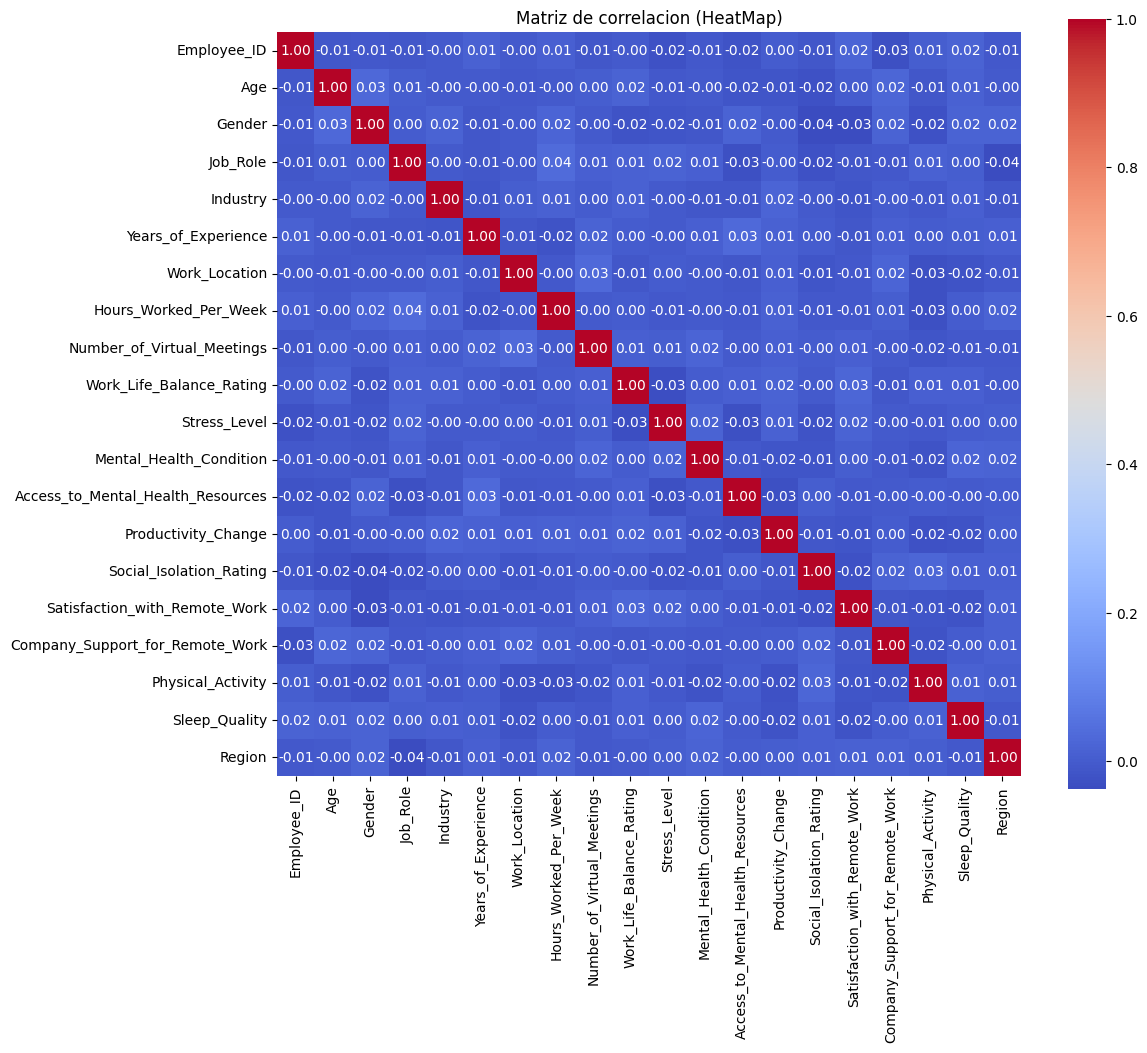

In [ ]:
#Hacemos un heatmap para ver si las variables tienen correlacion positiva, correlacion negativa o no hay correlacion.
correlacion = df1.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de correlacion (HeatMap)')
plt.show()

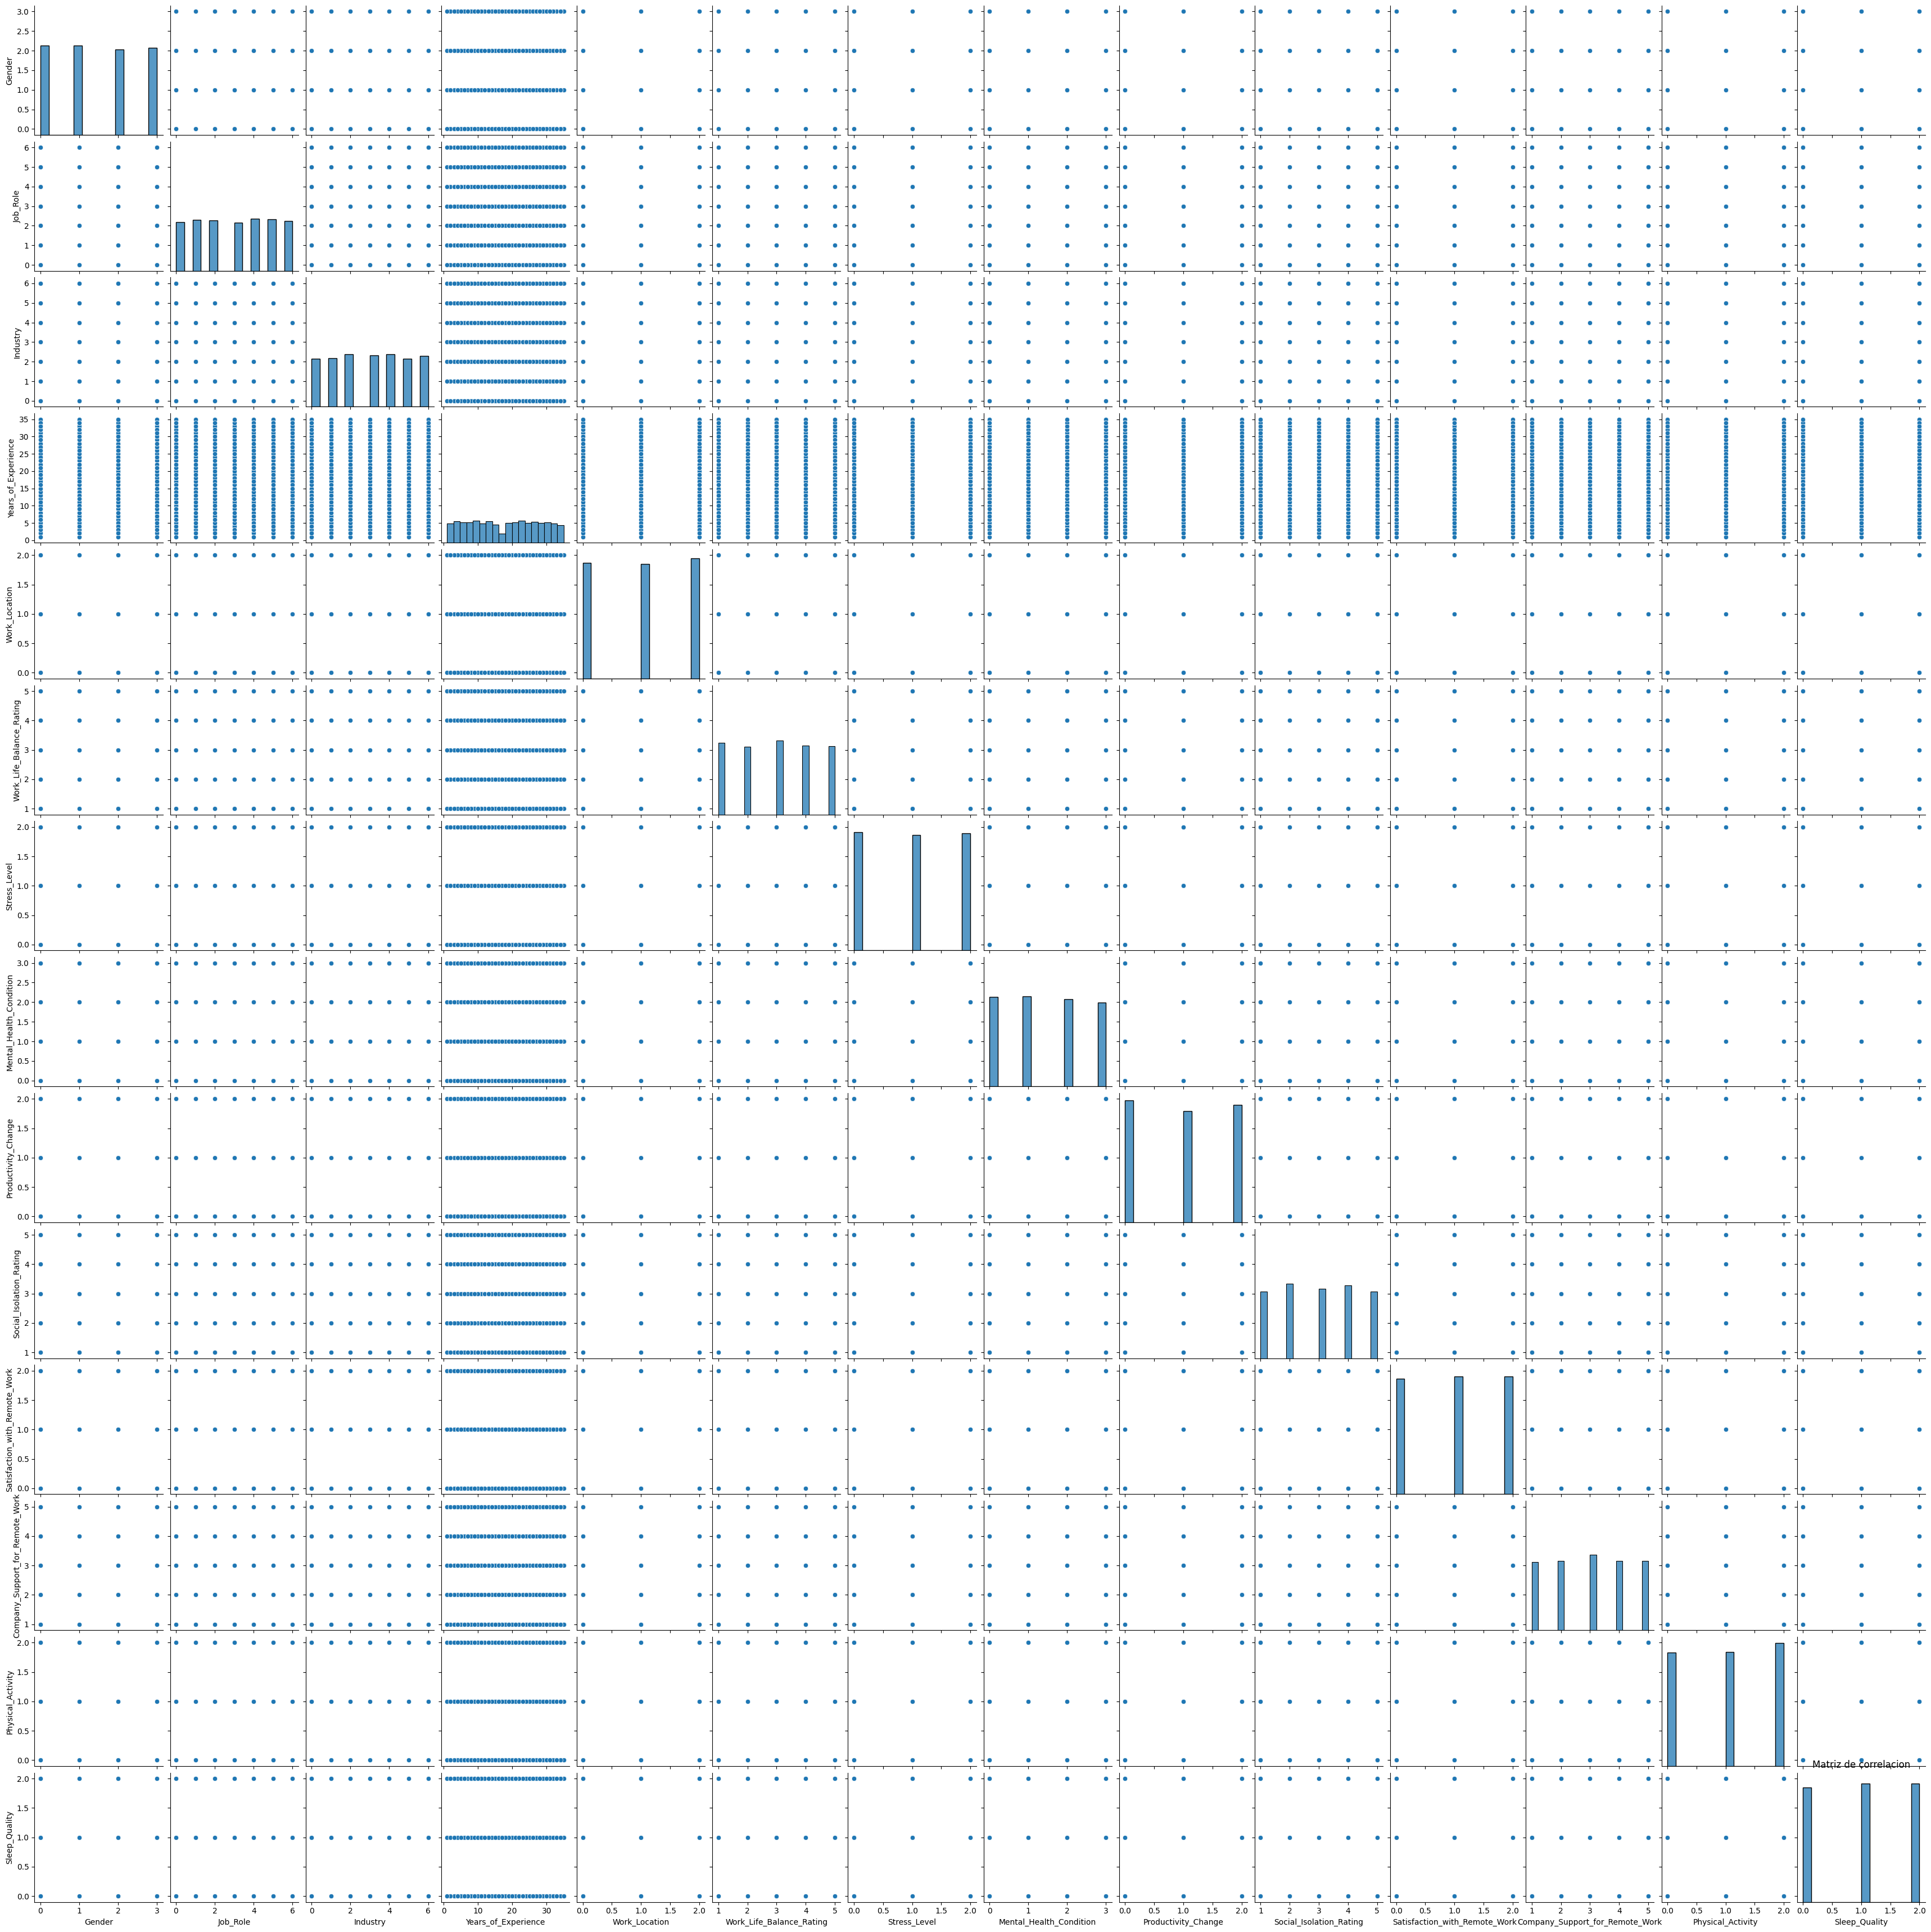

In [ ]:
sns.pairplot(df1[['Gender', 'Job_Role', 'Industry', 'Years_of_Experience', 'Work_Location', 'Work_Life_Balance_Rating', 'Stress_Level', 'Mental_Health_Condition', 'Productivity_Change', 'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work', 'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality']])
plt.title('Matriz de correlacion')
plt.show()

#Ahora vamos a empezar el proceso de aprendizaje y prediccion
## En esta etapa del proyecto, buscaremos predecir con las variables que tenemos, si los empleados que participaron de este dataset se consideran beneficiados con el trabajo remoto, o hibrido.
## Vamos a utilizar algoritmos de clasificacion ya que nuestra variable dependiente sera work_benefit que consta de tres valores que se deducen las variables Satisfaction_with_Remote_Work, Productivity_Change, Stress_Level, Work_Life_Balance_Rating, Mental_Health_Condition, Social_Isolation_Rating, Physical_Activity, Sleep_Quality. Todas estas columnas determinaran lo que queremos lograr en este trabajo.
## Los algoritmos que usaremos seran LogisticRegression, DecisionTree, RandomForest, SVM y GradientBoostingMachine.
##Ajustaremos hiperparametros para poder tener un mejor accuaracy.



In [4]:
#Creamos la funcion clasificar_beneficio para identificar los parametros que nos indicarian si el trabajo remoto e hibrido son beneficiosos o no
#para la salud. Esta funcion la aplicamos a una nueva columna que vamos a aniadir al dataset llamada Work_benefit
def clasificar_beneficio(row):
  if(
      row['Satisfaction_with_Remote_Work'] in ['Satisfied', 'Neutral'] and
      row['Physical_Activity'] in ['Daily', 'Weekly'] and
      row['Sleep_Quality'] in ['Good', 'Average'] and
      row['Productivity_Change'] in ['Increase', 'No Change'] and
      row['Stress_Level'] in ['Low', 'Medium'] and
      row['Work_Life_Balance_Rating'] >= 3 and
      row['Mental_Health_Condition'] in ['None', 'Anxiety'] and
      row['Social_Isolation_Rating'] < 3
  ):
    return 'Beneficioso'
  elif(
        row['Satisfaction_with_Remote_Work'] in ['Unsatisfied', 'Neutral'] and
        row['Productivity_Change'] in ['Decrease', 'No Change'] and
        row['Stress_Level'] in ['Medium','High'] and
        row['Work_Life_Balance_Rating'] <= 3 and
        row['Mental_Health_Condition'] != 'None' and
        row['Social_Isolation_Rating'] > 3 and
        row['Physical_Activity'] in ['None', 'Weekly'] and
        row['Sleep_Quality'] in ['Poor', 'Average']
    ):
    return 'No beneficioso'
  else:
    return 'Neutral'
df['Work_Benefit'] = df.apply(clasificar_beneficio, axis=1)
print(df['Work_Benefit'].value_counts())

Neutral           4805
No beneficioso     123
Beneficioso         72
Name: Work_Benefit, dtype: int64


In [ ]:
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Work_Benefit
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,...,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,Neutral
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,...,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,Neutral
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,...,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America,Neutral
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,...,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe,Neutral
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,...,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,Neutral


In [5]:
#Hacemos una copia del dataset para pasar las variables objeto a enteros para poder hacer el entrenamiento y las predicciones correctamente.
df1 = df.copy()
label_encoder =  LabelEncoder()
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = label_encoder.fit_transform(df1[col])

df1.sample(15)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Work_Benefit
1989,1989,38,2,5,1,7,1,28,14,3,...,2,0,1,5,0,2,0,2,0,1
2346,2346,39,3,4,1,13,0,43,3,5,...,0,1,0,1,1,3,2,0,2,1
4662,4662,33,3,5,6,2,1,53,1,5,...,2,1,1,3,1,1,2,1,2,1
2844,2844,25,2,2,4,3,1,28,2,2,...,2,0,2,1,1,5,2,1,5,1
782,782,24,2,0,0,8,1,26,8,1,...,3,1,1,1,1,4,0,2,0,1
135,135,51,2,3,4,26,2,46,4,5,...,1,0,1,4,2,5,1,1,4,1
2679,2679,23,2,0,4,27,0,22,6,1,...,1,1,0,4,1,3,0,0,3,1
130,130,32,0,1,1,16,2,23,9,1,...,3,0,2,5,0,5,2,1,0,1
3569,3569,58,1,0,4,8,1,43,2,1,...,3,1,2,3,0,4,0,1,5,1
737,737,55,3,2,1,27,2,45,10,4,...,3,0,1,1,2,5,0,2,0,1


##Aclaracion para el mejor entendimiento del trabajo.
###En la columna work_benefit tenemos los siguientes tres valores:
### 2 = Remote
### 1 = Onsite
### 0 = Hybrid

A continuacion filtraremos los datos para dividir los datos de entrenamiento y de prueba para luego usar los algoritmos de clasificacion y ver cual nos da una mejor prediccion.
Tambien crearemos una funcion para graficar y poder ver el reporte de cada algoritmo.


In [6]:
#Aqui usamos los algoritmos de clasificacion para entrenar y predecir si el trabajo remoto es beneficioso o no a la salud mental

# Filtrar datos para trabajo remoto
df_remote = df1[df1['Work_Location'] == 2]

# Separar características y etiquetas
X_remote = df_remote[['Satisfaction_with_Remote_Work', 'Productivity_Change', 'Stress_Level',
                      'Work_Life_Balance_Rating', 'Mental_Health_Condition', 'Social_Isolation_Rating',
                      'Physical_Activity', 'Sleep_Quality']]
y_remote = df_remote['Work_Benefit']

X_remote = X_remote.astype(float)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_remote, y_remote, test_size=0.3, random_state=42)

# Función para evaluar modelos
def evaluate_model(model, X_train, X_test, y_train, y_test, title):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy ({title}): {accuracy}")
    print("Clasificación Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_, cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

Accuracy (Logistic Regression): 0.9553398058252427
Clasificación Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.96      1.00      0.98       493
           2       0.00      0.00      0.00        12

    accuracy                           0.96       515
   macro avg       0.32      0.33      0.33       515
weighted avg       0.92      0.96      0.94       515



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


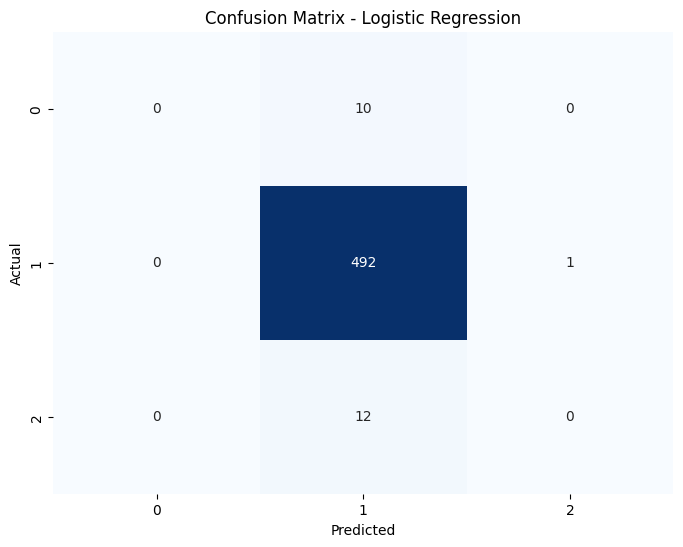

In [ ]:
# Modelo 1: Logistic Regression con hiperparámetros ajustados
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [1000, 2000],
    'class_weight': ['balanced', None],
    'tol': [1e-4, 1e-3, 1e-2],
}
logreg = GridSearchCV(LogisticRegression(random_state=42), param_grid_logreg, cv=5, scoring='accuracy')
evaluate_model(logreg, X_train, X_test, y_train, y_test, "Logistic Regression")

Accuracy (Decision Tree): 0.9728155339805825
Clasificación Report:
              precision    recall  f1-score   support

           0       0.53      0.90      0.67        10
           1       0.99      0.98      0.99       493
           2       0.77      0.83      0.80        12

    accuracy                           0.97       515
   macro avg       0.76      0.90      0.82       515
weighted avg       0.98      0.97      0.98       515



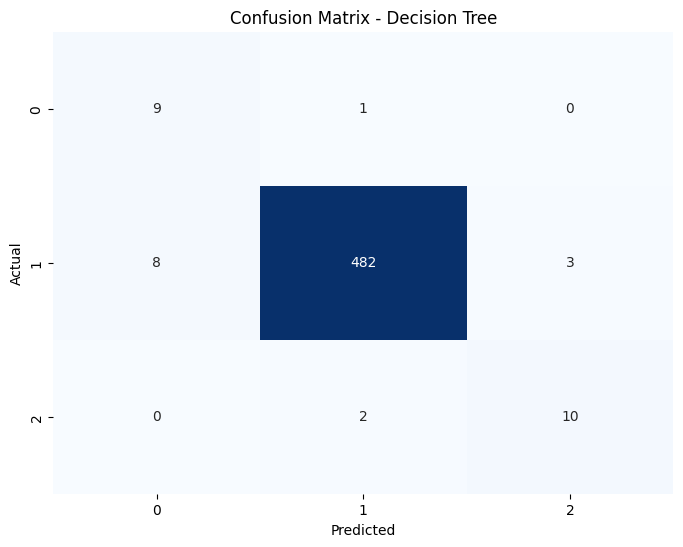

In [ ]:
# Modelo 2: Decision Tree con hiperparámetros ajustados
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random']
}
tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='accuracy')
evaluate_model(tree, X_train, X_test, y_train, y_test, "Decision Tree")

Accuracy (Random Forest): 0.9883495145631068
Clasificación Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.99      1.00      0.99       493
           2       0.90      0.75      0.82        12

    accuracy                           0.99       515
   macro avg       0.96      0.85      0.90       515
weighted avg       0.99      0.99      0.99       515



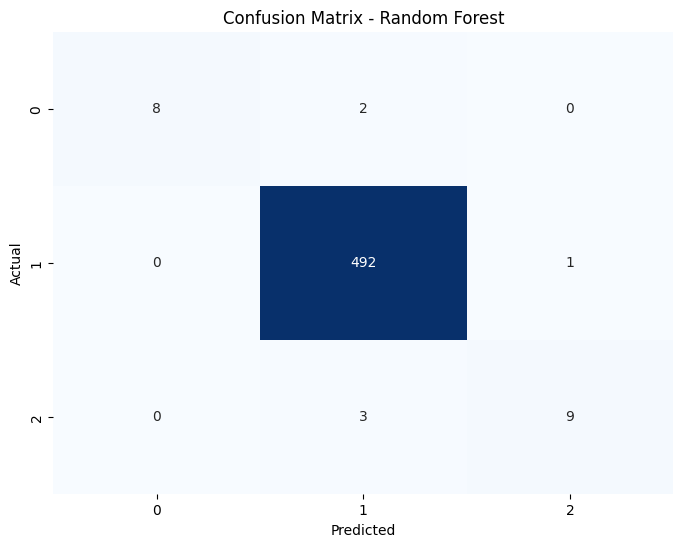

In [ ]:
# Modelo 3: Random Forest con hiperparámetros ajustados
param_grid_rf = {
    'n_estimators': [200, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
#Usamos RandomizedSearchCV para hacer una validacion cruzada para que el algoritmo tome aleatoriamente 100 de todas las combinaciones de datos posibles, porque sino
#el algoritmo toma demasiado tiempo en ejecutarse ya que con los hiperparametros ajustados hay muchisimas conbinaciones y el algoritmo tiene que trabajar demasiado.
rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid_rf,
                                 n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
evaluate_model(rand_search, X_train, X_test, y_train, y_test, "Random Forest")

Accuracy (SVM): 0.9631067961165048
Clasificación Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.96      1.00      0.98       493
           2       0.67      0.17      0.27        12

    accuracy                           0.96       515
   macro avg       0.88      0.45      0.53       515
weighted avg       0.96      0.96      0.95       515



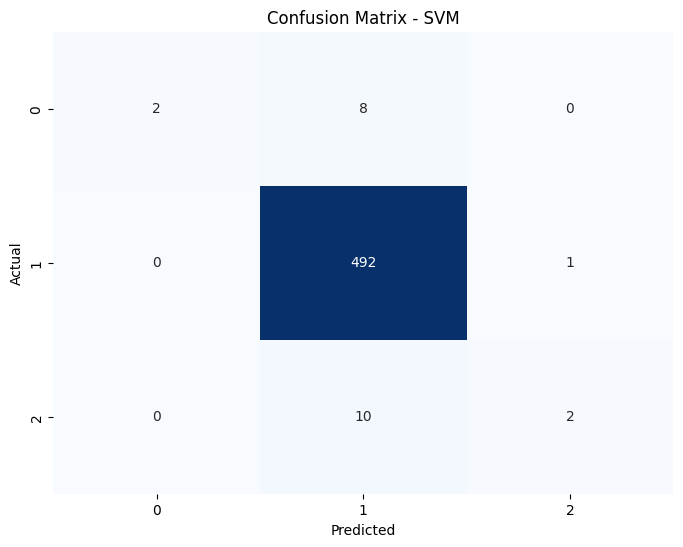

In [ ]:
# Modelo 4: SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
evaluate_model(svm, X_train, X_test, y_train, y_test, "SVM")

Accuracy (Gradient Boosting Machine): 0.9902912621359223
Clasificación Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.99      1.00      0.99       493
           2       1.00      0.83      0.91        12

    accuracy                           0.99       515
   macro avg       0.96      0.88      0.92       515
weighted avg       0.99      0.99      0.99       515



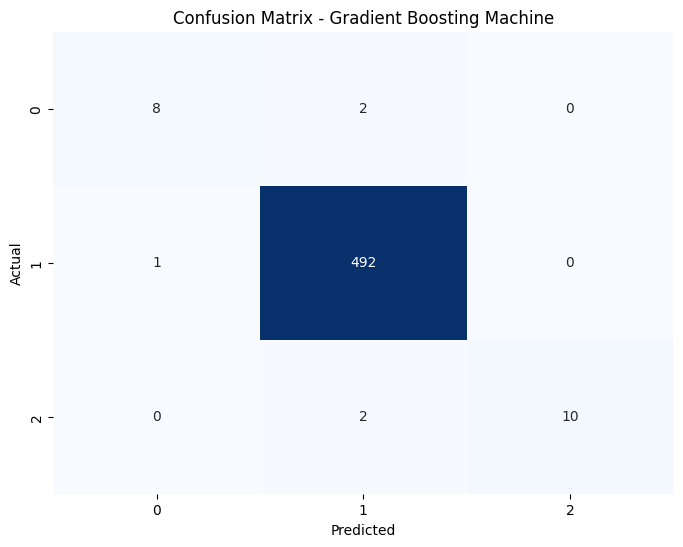

In [ ]:
# Modelo 5: Gradient Boosting Machine
param_grid_gbm = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}
gbm = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gbm, cv=5, scoring='accuracy')
evaluate_model(gbm, X_train, X_test, y_train, y_test, "Gradient Boosting Machine")

Vamos a hacer un grafico de barras para mostrar cual es el algoritmo que mejor rindio en el aprendizaje.

<ipython-input-11-f828ce32edb7>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="Modelo", y="Accuracy", data=visualizacion_algoritmos, palette="viridis")


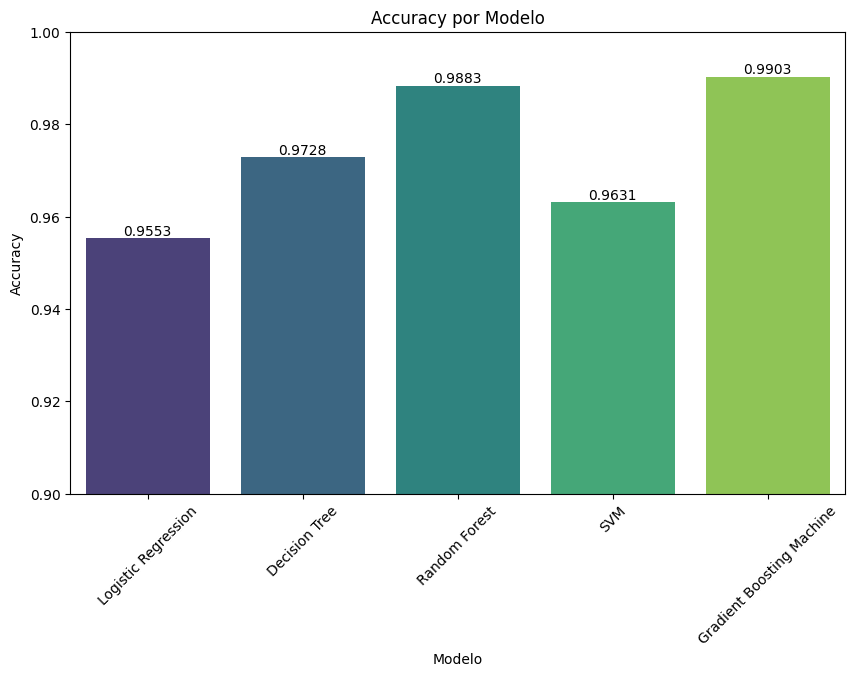

In [11]:
# Datos de precisión de los modelos
data = {
    "Modelo": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "SVM",
        "Gradient Boosting Machine"
    ],
    "Accuracy": [
        0.9553398058252427,
        0.9728155339805825,
        0.9883495145631068,
        0.9631067961165048,
        0.9902912621359223
    ]
}

visualizacion_algoritmos = pd.DataFrame(data)

# Gráfico de barras con valores visibles
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x="Modelo", y="Accuracy", data=visualizacion_algoritmos, palette="viridis")

# Agregar los valores sobre las barras
for index, row in visualizacion_algoritmos.iterrows():
    barplot.text(index, row["Accuracy"], f'{row["Accuracy"]:.4f}',
                 color='black', ha="center", va="bottom", fontsize=10)

# Configuración del gráfico
plt.title("Accuracy por Modelo")
plt.ylabel("Accuracy")
plt.xlabel("Modelo")
plt.xticks(rotation=45)
plt.ylim(0.9, 1.0)  # Ajustar para enfocar en rangos de alta precisión
plt.show()


##Finalmente podemos ver que el Gradient Boosting Machine luego de ajustar varios hiperparametros, es el algoritmo de clasificacion que mejor accuaracy nos dio.

In [ ]:
#Aqui usamos los algoritmos de clasificacion para entrenar y predecir si el trabajo hibrido es beneficioso o no a la salud mental

# Filtrar datos para trabajo hibrido
df_remote = df1[df1['Work_Location'] == 0]

# Separar características y etiquetas
X_remote = df_remote[['Satisfaction_with_Remote_Work', 'Productivity_Change', 'Stress_Level',
                      'Work_Life_Balance_Rating', 'Mental_Health_Condition', 'Social_Isolation_Rating',
                      'Physical_Activity', 'Sleep_Quality']]
y_remote = df_remote['Work_Benefit']
X_remote = X_remote.astype(float)


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_remote, y_remote, test_size=0.3, random_state=42)

# Función para evaluar modelos
def evaluate_model_H(model, X_train, X_test, y_train, y_test, title):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy ({title}): {accuracy}")
    print("Clasificación Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_, cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

Accuracy (Logistic Regression): 0.9777777777777777
Clasificación Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.98      1.00      0.99       484
           2       0.00      0.00      0.00         5

    accuracy                           0.98       495
   macro avg       0.33      0.33      0.33       495
weighted avg       0.96      0.98      0.97       495



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


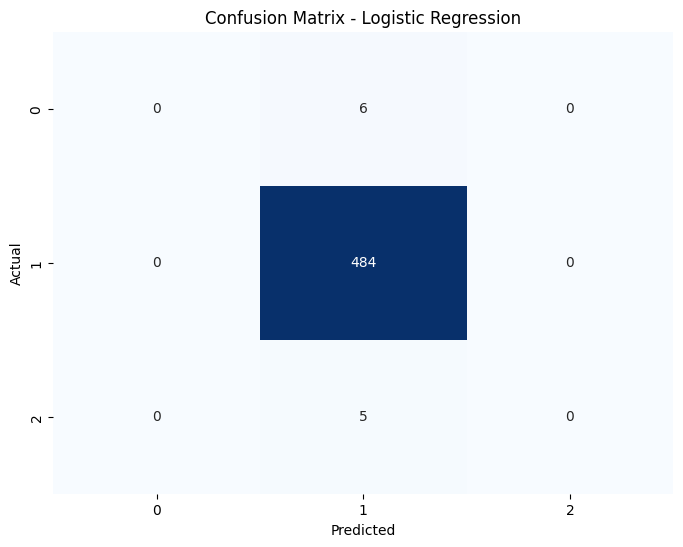

In [ ]:
# Modelo 1: Logistic Regression con hiperparámetros ajustados
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [1000, 2000],
    'class_weight': ['balanced', None],
    'tol': [1e-4, 1e-3]
}
logreg = GridSearchCV(LogisticRegression(random_state=42), param_grid_logreg, cv=5, scoring='accuracy')
evaluate_model_H(logreg, X_train, X_test, y_train, y_test, "Logistic Regression")

Accuracy (Decision Tree): 0.9717171717171718
Clasificación Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.99      0.98      0.99       484
           2       0.20      0.40      0.27         5

    accuracy                           0.97       495
   macro avg       0.73      0.63      0.64       495
weighted avg       0.98      0.97      0.97       495



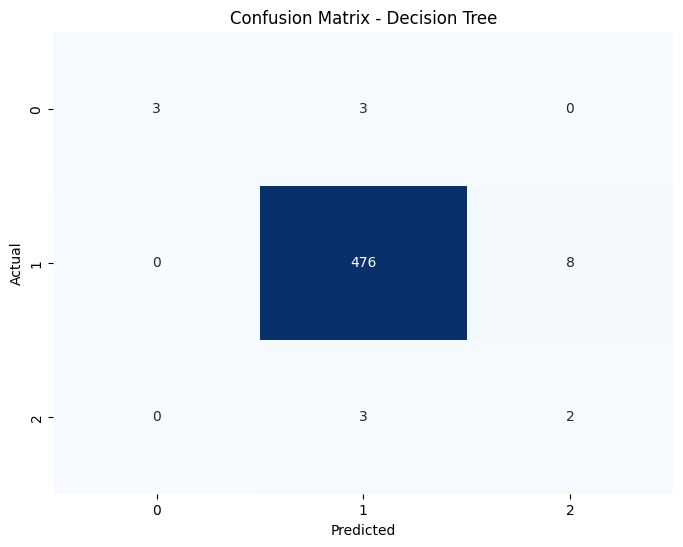

In [ ]:
# Modelo 2: Decision Tree con hiperparámetros ajustados
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random']
}
tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='accuracy')
evaluate_model_H(tree, X_train, X_test, y_train, y_test, "Decision Tree")

Accuracy (Random Forest): 0.9858585858585859
Clasificación Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.99      1.00      0.99       484
           2       0.60      0.60      0.60         5

    accuracy                           0.99       495
   macro avg       0.86      0.70      0.75       495
weighted avg       0.99      0.99      0.98       495



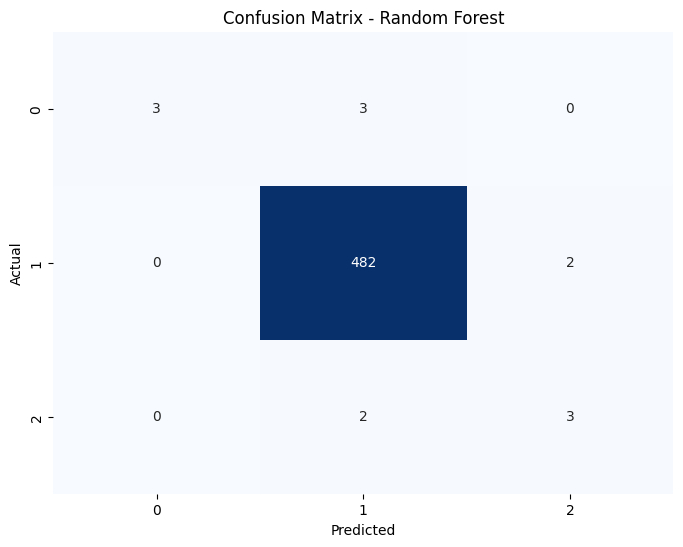

In [ ]:
# Modelo 3: Random Forest con hiperparámetros ajustados
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
#Usamos RandomizedSearchCV para hacer una validacion cruzada para que el algoritmo tome aleatoriamente 100 de todas las combinaciones de datos posibles, porque sino
#el algoritmo toma demasiado tiempo en ejecutarse ya que con los hiperparametros ajustados hay muchisimas conbinaciones y el algoritmo tiene que trabajar demasiado.
rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid_rf,
                                 n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
evaluate_model_H(rand_search, X_train, X_test, y_train, y_test, "Random Forest")

Accuracy (SVM): 0.9696969696969697
Clasificación Report:
              precision    recall  f1-score   support

           0       0.40      0.33      0.36         6
           1       0.98      0.99      0.98       484
           2       0.20      0.20      0.20         5

    accuracy                           0.97       495
   macro avg       0.53      0.51      0.52       495
weighted avg       0.97      0.97      0.97       495



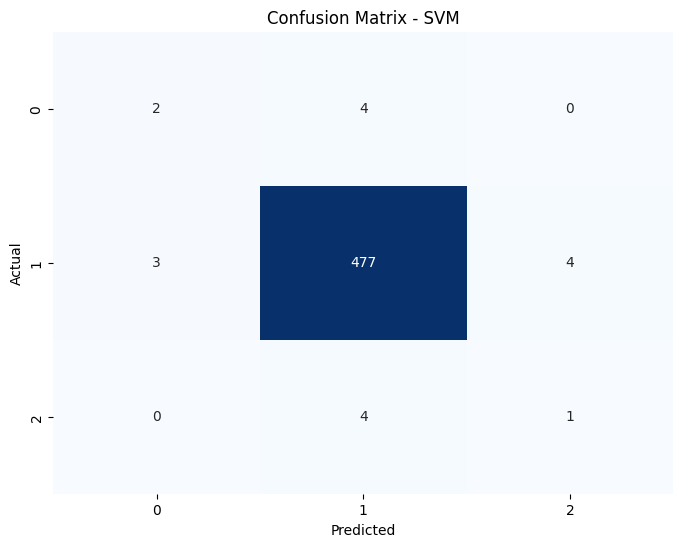

In [ ]:
# Modelo 4: SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
evaluate_model_H(svm, X_train, X_test, y_train, y_test, "SVM")

Accuracy (Gradient Boosting Machine): 0.98989898989899
Clasificación Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.99      1.00      0.99       484
           2       1.00      0.80      0.89         5

    accuracy                           0.99       495
   macro avg       1.00      0.71      0.79       495
weighted avg       0.99      0.99      0.99       495



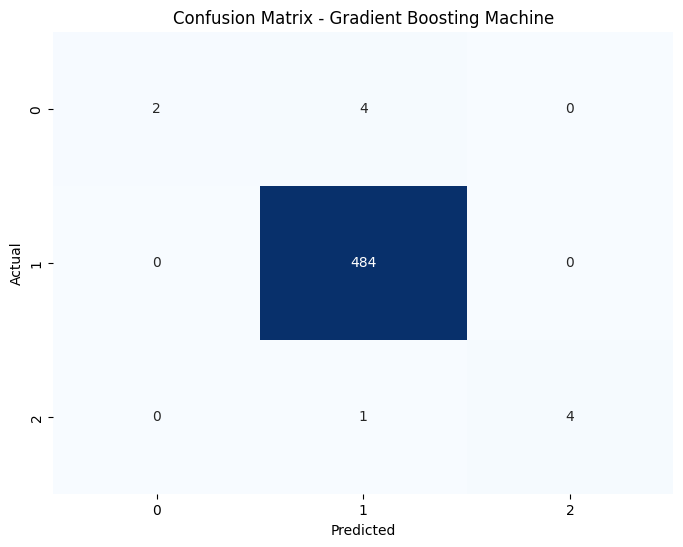

In [ ]:
# Modelo 5: Gradient Boosting Machine
param_grid_gbm = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gbm = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gbm, cv=5, scoring='accuracy')
evaluate_model_H(gbm, X_train, X_test, y_train, y_test, "Gradient Boosting Machine")

Aqui mostraremos un grafico de barras tambien para el caso del trabajo hibrido.

<ipython-input-12-87a1222d054b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="Modelo", y="Accuracy", data=visualizacion_algoritmos, palette="viridis")


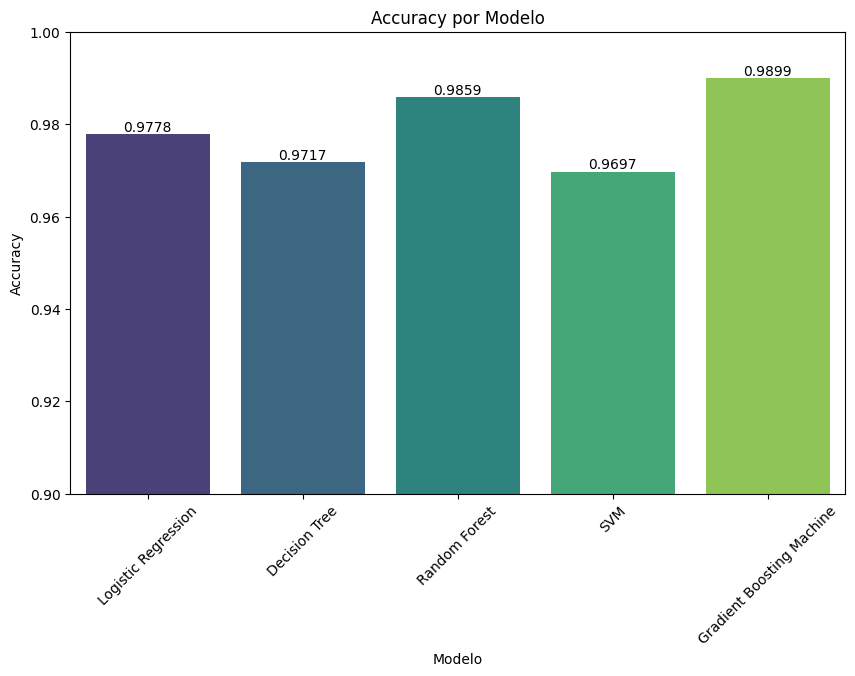

In [12]:
# Datos de precisión de los modelos
data = {
    "Modelo": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "SVM",
        "Gradient Boosting Machine"
    ],
    "Accuracy": [
        0.9777777777777777,
        0.9717171717171718,
        0.9858585858585859,
        0.9696969696969697,
        0.98989898989899
    ]
}

visualizacion_algoritmos = pd.DataFrame(data)

# Gráfico de barras con valores visibles
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x="Modelo", y="Accuracy", data=visualizacion_algoritmos, palette="viridis")

# Agregar los valores sobre las barras
for index, row in visualizacion_algoritmos.iterrows():
    barplot.text(index, row["Accuracy"], f'{row["Accuracy"]:.4f}',
                 color='black', ha="center", va="bottom", fontsize=10)

# Configuración del gráfico
plt.title("Accuracy por Modelo")
plt.ylabel("Accuracy")
plt.xlabel("Modelo")
plt.xticks(rotation=45)
plt.ylim(0.9, 1.0)  # Ajustar para enfocar en rangos de alta precisión
plt.show()


En este caso tambien llegamos al caso que el Gradient Boost Machine es el algoritmo mas eficiente junto con el random forest que casi obtiene el mismo accuaracy.

#Conclusion
## En conclusion podemos ver que la mayoria de los trabajadores se encuentran en una posicion neutral en cuanto al trabajo remoto y al hibrido. Son pocos los que encuentran una mejora positiva en su salud mental al aplicar estos metodos de trabajo. Y son menos los que se encuentran disgustados con estas modalidades.
## El metodo mas eficaz de prediccion a la hora de querer predecir si el trabajo remoto es beneficioso o no a la salud mental fue el gradient boosting machine, y para la modalidad hibrida fue el gradient boosting machine y el random forest.

## Con esta conclusion final podriamos decir que en cuanto a salud mental, no necesariamente considerariamos a estas modalidades como beneficiosas. Las empresas deberian apuntar a mejorar o cambiar otros ambitos del trabajo si lo que buscan es que sus empleados esten a gusto y saludables en su trabajo.